# Cureya Task-04:ALL CUSTOMER CLUSTERING ANALYSIS
## Moinuddin Farooqui
group the customers based on the similarity using the following algorithms:
● K_means_clustering
● Hierarchical clustering


## Importing the Required Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Mall Customer Dataset

In [34]:
df=pd.read_csv('/content/Mall_Customers (1).csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Checking The Missing Values

In [6]:
df.replace(" ",np.NaN)
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##Encoding Genre column

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Genre']=le.fit_transform(df['Genre'])

In [9]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [10]:
df.shape

(200, 5)

## K Means Clustering

In [11]:
from sklearn.cluster import KMeans

## Elbow Method

In [12]:
k =range(2,11)
ssd=[] #sum_sq_distance
for i in k:
  model=KMeans(n_clusters=i)
  model.fit(df)
  ssd.append(model.inertia_)

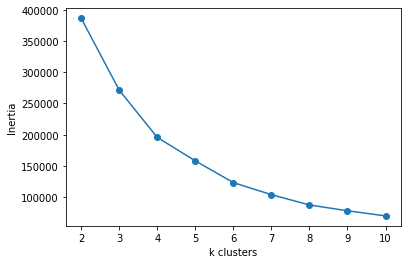

In [13]:
plt.plot(k, ssd, marker='o')
plt.xticks(k)
plt.xlabel("k clusters")
plt.ylabel("Inertia")
plt.show()

In [14]:
model = KMeans(n_clusters = 6)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
model.labels_

array([5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 3, 0,
       0, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [16]:
model.n_iter_

4

In [17]:
model.cluster_centers_

array([[109.61363636,   0.40909091,  38.29545455,  63.84090909,
         51.20454545],
       [ 24.        ,   0.39130435,  25.52173913,  26.30434783,
         78.56521739],
       [166.82352941,   0.44117647,  32.26470588,  88.88235294,
         82.76470588],
       [164.88571429,   0.54285714,  41.25714286,  88.37142857,
         17.42857143],
       [ 67.14634146,   0.43902439,  46.75609756,  48.24390244,
         50.6097561 ],
       [ 23.        ,   0.39130435,  45.2173913 ,  26.30434783,
         20.91304348]])

In [18]:
data = df.copy() 
 
data["Final Label"] = model.labels_
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Final Label
0,1,1,19,15,39,5
1,2,1,21,15,81,1
2,3,0,20,16,6,5
3,4,0,23,16,77,1
4,5,0,31,17,40,5
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,3
197,198,1,32,126,74,2
198,199,1,32,137,18,3


## Selecting only two features for model for visualization of Clusters

In [19]:
X = df[["Age","Annual Income (k$)"]]
X.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [20]:
k = range(2,11)
ssd = []
for i in k:
    model = KMeans(n_clusters = i)
    model.fit(X)
    ssd.append(model.inertia_)
 


Text(0, 0.5, 'Inertia')

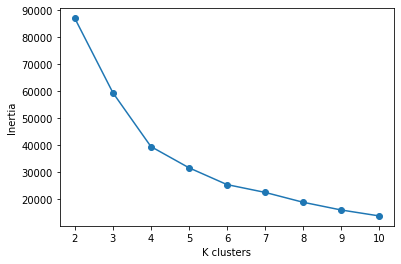

In [21]:
plt.plot(k, ssd, marker = 'o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia")

In [22]:
model = KMeans(n_clusters = 6)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
centroid = model.cluster_centers_
#just for checking centroid values
for i in range(centroid.shape[0]):
    print(centroid[i])
centroid.shape

[36.8490566  79.01886792]
[52.45454545 34.40909091]
[27.72972973 27.21621622]
[ 36.6 109.7]
[57.51351351 57.35135135]
[25.06451613 59.48387097]


(6, 2)

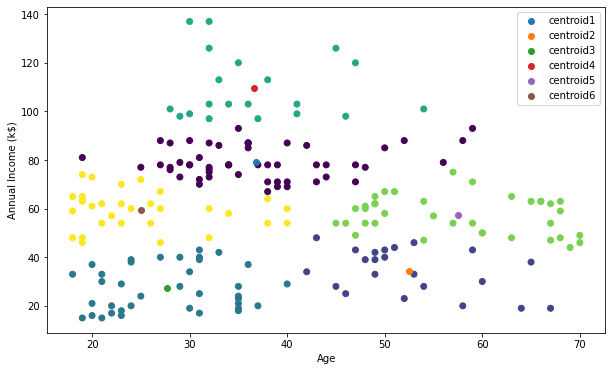

In [24]:
fig = plt.figure(figsize = (10,6))
plt.scatter(X["Age"], X["Annual Income (k$)"], c = model.labels_)
for i in range(centroid.shape[0]):
    plt.scatter(centroid[i][0], centroid[i][1], label = "centroid"+str(i+1))
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend()
plt.show()

In [25]:
data.groupby(by="Final Label").mean()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
Final Label,,,,,
0,109.613636,0.409091,38.295455,63.840909,51.204545
1,24.000000,0.391304,25.521739,26.304348,78.565217
2,166.823529,0.441176,32.264706,88.882353,82.764706
3,164.885714,0.542857,41.257143,88.371429,17.428571
4,67.146341,0.439024,46.756098,48.243902,50.609756
5,23.000000,0.391304,45.217391,26.304348,20.913043


## Hierarchical Cluter (Agglomerative Cluster)

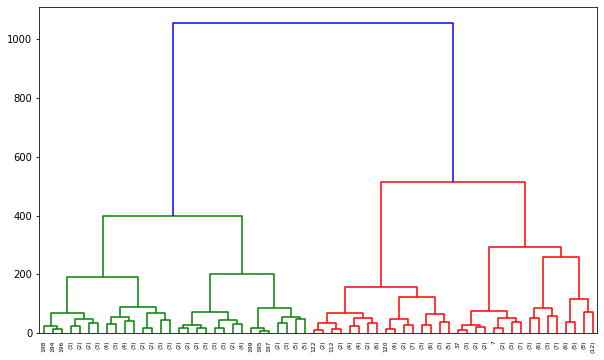

In [26]:
from scipy.cluster import hierarchy
fig = plt.figure(figsize = (10,6))
den = hierarchy.dendrogram(hierarchy.linkage(df, method = 'ward'),p=5,truncate_mode="level")

In [27]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 3)
model.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [28]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

## Selecting only two features for model for visualization of Clusters

In [29]:
X = df[["Age","Annual Income (k$)"]]
X.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


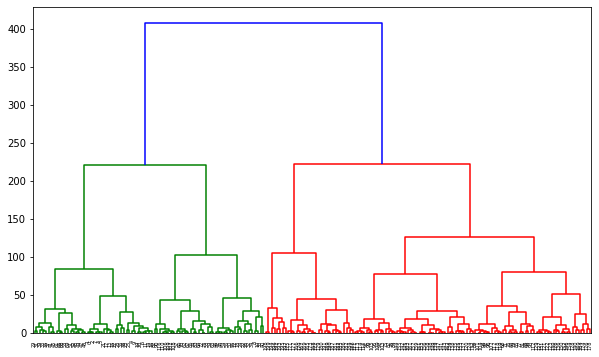

In [30]:
from scipy.cluster import hierarchy
fig = plt.figure(figsize = (10,6))
den = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))

In [31]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 4)
model.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [32]:
model.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       0, 1, 3, 3, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

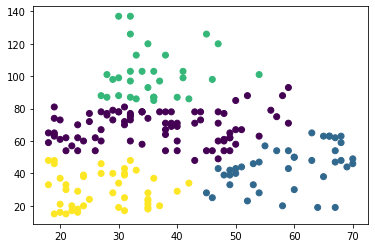

In [33]:
plt.scatter(X["Age"], X["Annual Income (k$)"], c = model.labels_)